In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, ttest_1samp, ttest_rel, ttest_ind
from statsmodels.stats import proportion as pr
import warnings
warnings.filterwarnings('ignore')

np.random.seed(123456789)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [19]:
# load dataset
data = pd.read_csv("StudentsPerformance.csv")
print(f"shape: {data.shape}" )
print(data[['math score', 'reading score', 'writing score']])

shape: (1000, 8)
     math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]


In [15]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
p_male = (data['gender']== 'male').mean()
p_female = (data['gender']== 'female').mean()

print(p_male, p_female)

0.482 0.518


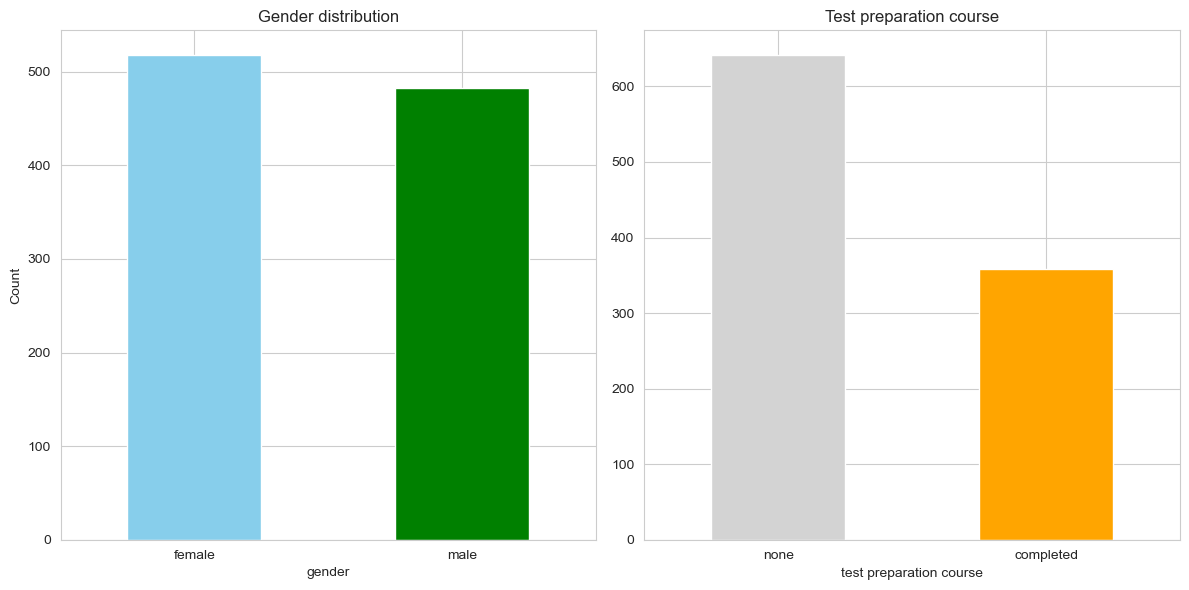

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['gender'].value_counts().plot(kind="bar", color=["skyblue", "green"])
plt.title("Gender distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
data['test preparation course'].value_counts().plot(kind="bar", color=["lightgray", "orange"])
plt.title("Test preparation course")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [74]:
# conditional probability

prep_completed = data[data['test preparation course'] == 'completed']
prep_none = data[data['test preparation course'] == 'none']

p_high_with_prep = (prep_completed['math score'] > 70).mean()
p_high_no_prep = (prep_none['math score'] > 70).mean()

In [76]:
print(f"P(Math > 70 | Prep Completed) = {p_high_with_prep:.3f}")
print(f"P(Math > 70 | No Prep ) = {p_high_no_prep:.3f}")

P(Math > 70 | Prep Completed) = 0.469
P(Math > 70 | No Prep ) = 0.347


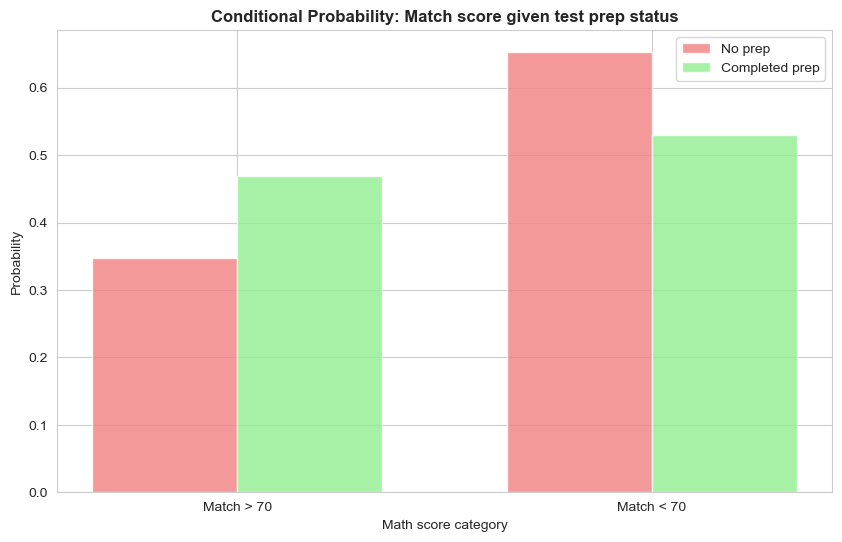

In [78]:
plt.figure(figsize = (10, 6))
categories = ["Match > 70", "Match < 70"]
prep_data = [p_high_with_prep, 1-p_high_with_prep]
no_prep_data = [p_high_no_prep, 1-p_high_no_prep]


x = np.arange(len(categories))
width = 0.35

plt.bar(x - width / 2, no_prep_data, width, label = "No prep", color="lightcoral", alpha = 0.8)
plt.bar(x + width / 2, prep_data, width, label = "Completed prep", color="lightgreen", alpha = 0.8)

plt.xlabel("Math score category")
plt.ylabel("Probability")
plt.title("Conditional Probability: Match score given test prep status", fontweight = "bold")
plt.xticks(x, categories)
plt.legend()
plt.show()

Mean:50.48 (Expected: 50)


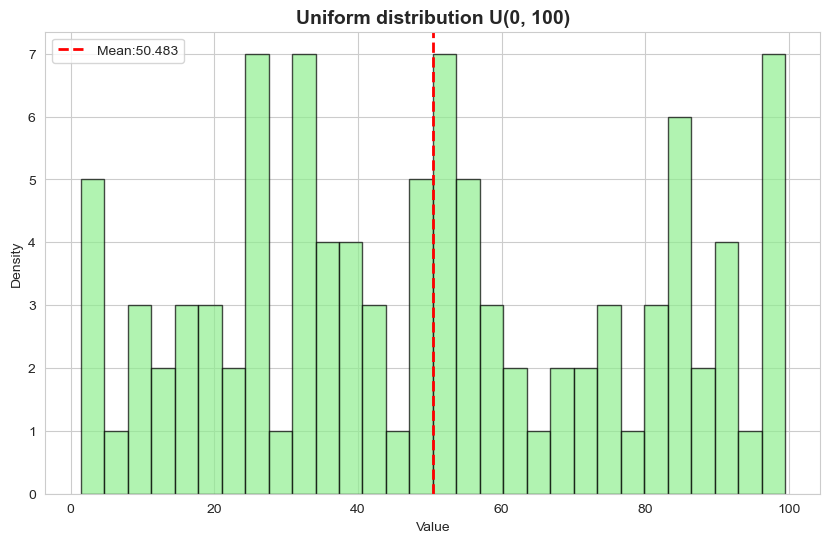

In [104]:
# probability distributions
uniform_samples = np.random.uniform(0, 100, 100)
print(f"Mean:{uniform_samples.mean():.2f} (Expected: 50)")
plt.figure(figsize = (10, 6))

plt.hist(uniform_samples, bins=30, density=False, alpha=0.7, color="lightgreen", edgecolor="black")
plt.axvline(uniform_samples.mean(), color="red", linestyle='--', linewidth=2, label=f'Mean:{uniform_samples.mean():.3f}')

plt.title("Uniform distribution U(0, 100)", fontsize=14, fontweight="bold")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

Mean: 66.09, Std: 15.16


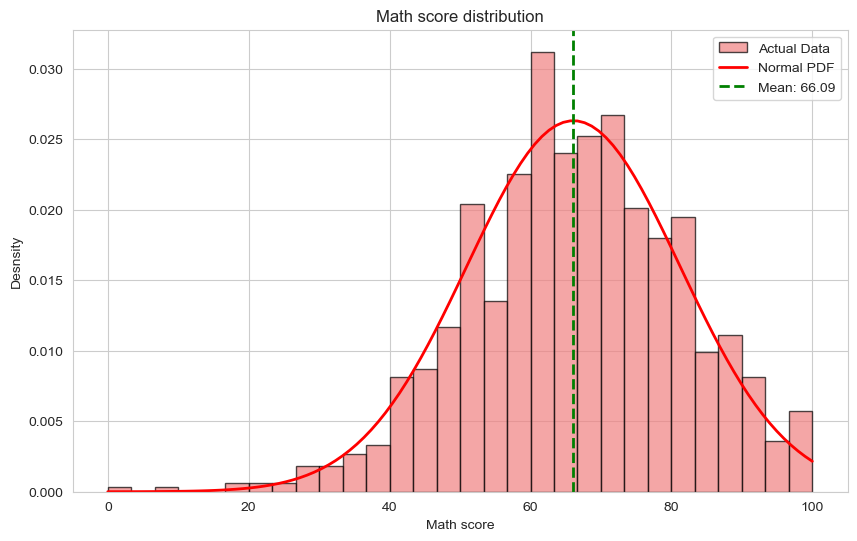

In [118]:
# normal distribution

math_mean = data['math score'].mean()
math_std = data['math score'].std()

print(f"Mean: {math_mean:.2f}, Std: {math_std:.2f}")

plt.figure(figsize=(10,6))
plt.hist(data['math score'], bins=30, density=True, alpha=0.7, color="lightcoral", edgecolor='black', label="Actual Data")

x_range = np.linspace(data['math score'].min(), data['math score'].max(), 100)
plt.plot(x_range, norm.pdf(x_range, math_mean, math_std), 'r-', linewidth=2, label='Normal PDF')
plt.axvline(math_mean, color='green', linestyle='--', linewidth=2, label=f"Mean: {math_mean:.2f}")
plt.title("Math score distribution")
plt.xlabel("Math score")
plt.ylabel("Desnsity")
plt.legend()
plt.show()